# Historical Inflation Metrics

### 1. Imports

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

### 2. Data processing

#### 2.1. Reading data from CSV

In [52]:
SHILLER_DATA_PATH = "../../data/raw/shiller.csv"
INFLATION_COLS = [ "date", "cpi" ]

In [53]:
shiller_df = pd.read_csv(SHILLER_DATA_PATH)
shiller_df

,date,price,dividends,earnings,cpi,long_term_interest_rate
0,1871-01,4.44,0.26000,0.40,12.464,5.32
1,1871-02,4.50,0.26000,0.40,12.845,5.32
2,1871-03,4.61,0.26000,0.40,13.035,5.33
3,1871-04,4.74,0.26000,0.40,12.559,5.33
4,1871-05,4.86,0.26000,0.40,12.274,5.33
...,...,...,...,...,...,...
1837,2024-02,5011.96,70.65111,191.74,310.326,4.21
1838,2024-03,5170.57,70.82483,191.39,312.332,4.21
1839,2024-04,5112.49,71.20848,193.18,313.548,4.54
1840,2024-05,5235.23,71.59214,194.97,314.069,4.48


#### 2.2. Keeping only the relevant information

In [54]:
cpi_df = shiller_df[INFLATION_COLS]
cpi_df

,date,cpi
0,1871-01,12.464
1,1871-02,12.845
2,1871-03,13.035
3,1871-04,12.559
4,1871-05,12.274
...,...,...
1837,2024-02,310.326
1838,2024-03,312.332
1839,2024-04,313.548
1840,2024-05,314.069


#### 2.3. Appending additional columns

In [55]:
DATE_COL = "date"
CPI_COL = "cpi"
MONTHLY_COL = "1_mo_inflation_rate"
ANNUAL_COL = "1_yr_inflation_rate"
SHORT_TERM_COL = "5_yr_inflation_rate"
LONG_TERM_COL = "10_yr_inflation_rate"

In [56]:
inflation_df = cpi_df.copy()

##### 2.3.1. Basic monthly inflation measure

In [57]:
inflation_df[MONTHLY_COL] = inflation_df[CPI_COL].pct_change()
inflation_df

,date,cpi,1_mo_inflation_rate
0,1871-01,12.464,NaN
1,1871-02,12.845,0.030568
2,1871-03,13.035,0.014792
3,1871-04,12.559,-0.036517
4,1871-05,12.274,-0.022693
...,...,...,...
1837,2024-02,310.326,0.006190
1838,2024-03,312.332,0.006464
1839,2024-04,313.548,0.003893
1840,2024-05,314.069,0.001662


##### 2.3.2. Annualized 1-year inflation measure

In [58]:
inflation_df[ANNUAL_COL] = inflation_df[CPI_COL].pct_change(periods=12)
inflation_df

,date,cpi,1_mo_inflation_rate,1_yr_inflation_rate
0,1871-01,12.464,NaN,NaN
1,1871-02,12.845,0.030568,NaN
2,1871-03,13.035,0.014792,NaN
3,1871-04,12.559,-0.036517,NaN
4,1871-05,12.274,-0.022693,NaN
...,...,...,...,...
1837,2024-02,310.326,0.006190,0.031532
1838,2024-03,312.332,0.006464,0.034774
1839,2024-04,313.548,0.003893,0.033574
1840,2024-05,314.069,0.001662,0.032690


##### 2.3.3. Annualized 5- and 10-year inflation measures

In [59]:
inflation_df[SHORT_TERM_COL] = inflation_df[CPI_COL].pct_change(periods=60)
inflation_df[LONG_TERM_COL] = inflation_df[CPI_COL].pct_change(periods=120)
inflation_df

,date,cpi,1_mo_inflation_rate,1_yr_inflation_rate,5_yr_inflation_rate,10_yr_inflation_rate
0,1871-01,12.464,NaN,NaN,NaN,NaN
1,1871-02,12.845,0.030568,NaN,NaN,NaN
2,1871-03,13.035,0.014792,NaN,NaN,NaN
3,1871-04,12.559,-0.036517,NaN,NaN,NaN
4,1871-05,12.274,-0.022693,NaN,NaN,NaN
...,...,...,...,...,...,...
1837,2024-02,310.326,0.006190,0.031532,0.227672,0.321768
1838,2024-03,312.332,0.006464,0.034774,0.228676,0.321800
1839,2024-04,313.548,0.003893,0.033574,0.226963,0.322586
1840,2024-05,314.069,0.001662,0.032690,0.226391,0.320172


##### 2.3.4. Save results as derived dataset

In [60]:
INFLATION_DATA_PATH = "../../data/derived/inflation.csv"

In [61]:
inflation_df.to_csv(INFLATION_DATA_PATH)

### 3. Analysis of results

In [62]:
MONTHLY_SUBSET = [DATE_COL, MONTHLY_COL]
ANNUAL_SUBSET = [DATE_COL, ANNUAL_COL]
SHORT_TERM_SUBSET = [DATE_COL, SHORT_TERM_COL]
LONG_TERM_SUBSET = [DATE_COL, LONG_TERM_COL]

MONTHLY_PCT_COL = "1_mo_inflation_pct"
ANNUAL_PCT_COL = "1_yr_inflation_pct"
SHORT_TERM_PCT_COL = "5_yr_inflation_pct"
LONG_TERM_PCT_COL = "10_yr_inflation_pct"

In [63]:
monthly_df = inflation_df[MONTHLY_SUBSET].copy()
annual_df = inflation_df[ANNUAL_SUBSET].copy()
short_term_df = inflation_df[SHORT_TERM_SUBSET].copy()
long_term_df = inflation_df[LONG_TERM_SUBSET].copy()

In [64]:
monthly_df[MONTHLY_PCT_COL] = monthly_df[MONTHLY_COL].apply(lambda x: x*100.0)
monthly_df = monthly_df.drop(MONTHLY_COL, axis=1)

annual_df[ANNUAL_PCT_COL] = annual_df[ANNUAL_COL].apply(lambda x: x*100.0)
annual_df = annual_df.drop(ANNUAL_COL, axis=1)

short_term_df[SHORT_TERM_PCT_COL] = short_term_df[SHORT_TERM_COL].apply(lambda x: x*100.0)
short_term_df = short_term_df.drop(SHORT_TERM_COL, axis=1)

long_term_df[LONG_TERM_PCT_COL] = long_term_df[LONG_TERM_COL].apply(lambda x: x*100.0)
long_term_df = long_term_df.drop(LONG_TERM_COL, axis=1)

#### 3.1. CPI value analysis

##### 3.1.1. Raw CPI rate

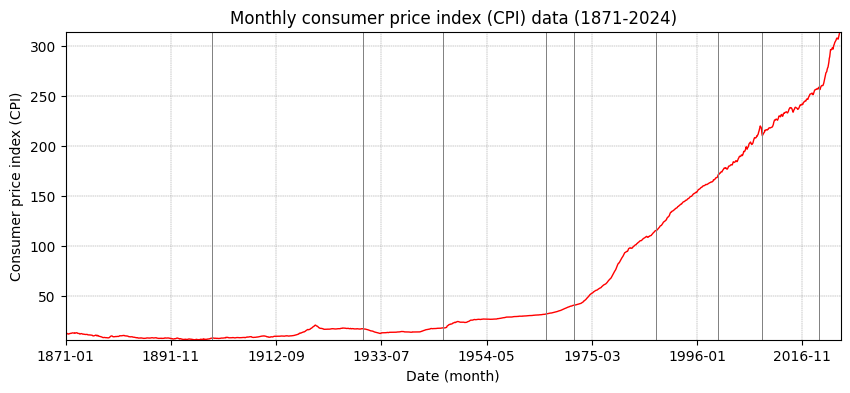

In [65]:
cpi_df.plot(x=DATE_COL, y=CPI_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly consumer price index (CPI) data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Consumer price index (CPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.1.2. Differential CPI rate

In [66]:
cpi_stats_df = cpi_df.copy()
cpi_stats_df["cpi_diff"] = cpi_stats_df[CPI_COL].diff()

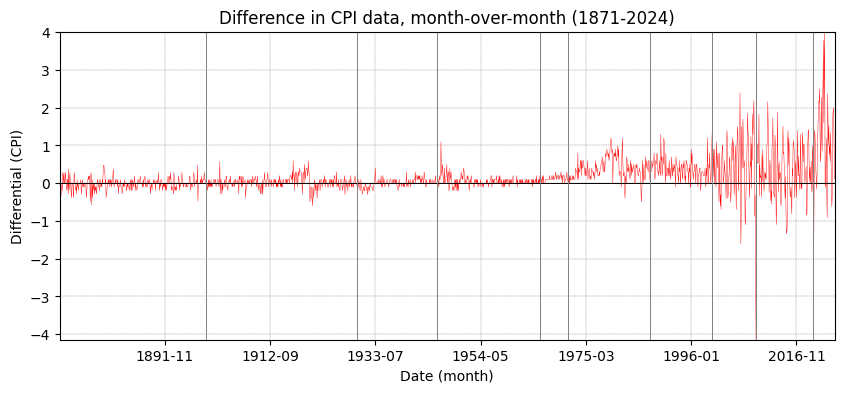

In [67]:
cpi_stats_df.plot(x=DATE_COL, y="cpi_diff", lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axhline(y=0.0, ls='-', lw=0.7, c='black')
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Difference in CPI data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Differential (CPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.2. Inflation rate analysis

##### 3.2.1. Monthly inflation trends

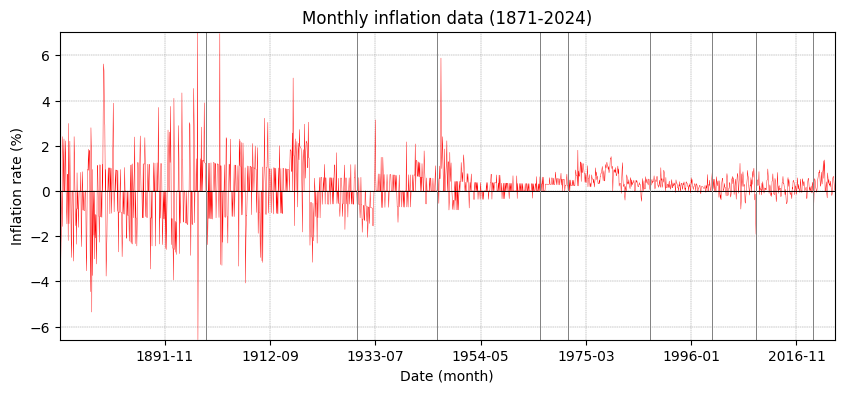

In [68]:
monthly_df.plot(x=DATE_COL, y=MONTHLY_PCT_COL, lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axhline(y=0.0, ls='-', lw=0.7, c='black')
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly inflation data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.2.2. Annual inflation trends

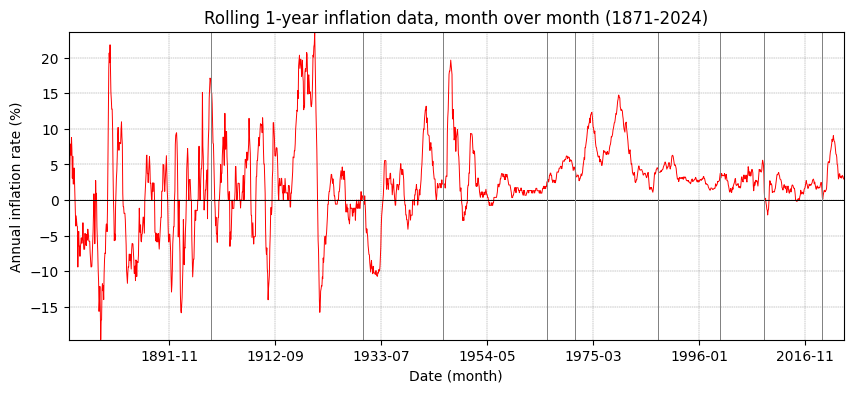

In [69]:
annual_df.plot(x=DATE_COL, y=ANNUAL_PCT_COL, lw=0.7, c='red', legend=False, figsize=(10,4))
plt.axhline(y=0.0, ls='-', lw=0.7, c='black')
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 1-year inflation data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Annual inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.2.3. 5-year inflation trends

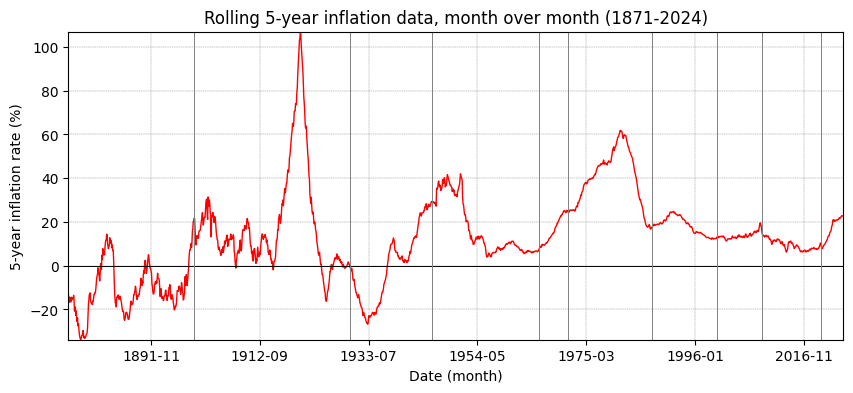

In [70]:
short_term_df.plot(x=DATE_COL, y=SHORT_TERM_PCT_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axhline(y=0.0, ls='-', lw=0.7, c='black')
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 5-year inflation data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("5-year inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.2.4. 10-year inflation trends

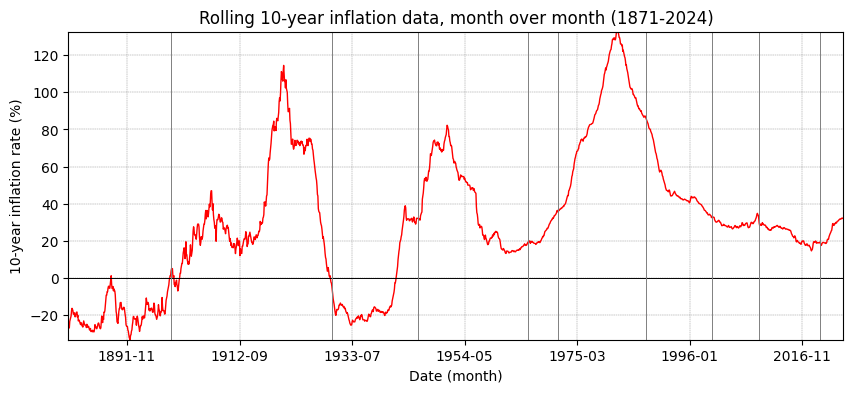

In [71]:
long_term_df.plot(x=DATE_COL, y=LONG_TERM_PCT_COL, lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axhline(y=0.0, ls='-', lw=0.7, c='black')
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 10-year inflation data, month over month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("10-year inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.3. Valuation analysis

##### 3.3.1. Real dollar value over time (w.r.t. 1871)

In [72]:
real_df = cpi_df.copy()
real_df.iloc[:,1:] = \
  (real_df.iloc[:,1:] - real_df.iloc[0,1:].values.squeeze()).div(real_df.iloc[0,1:])
real_df = real_df.rename(columns={CPI_COL: "real_value"})
real_df["real_value"] = real_df["real_value"].apply(lambda x: 100*(x+1))

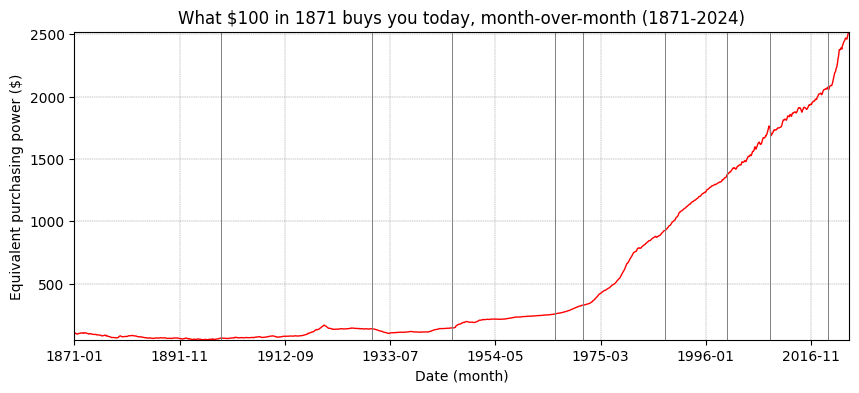

In [73]:
real_df.plot(x=DATE_COL, y="real_value", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("What $100 in 1871 buys you today, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Equivalent purchasing power ($)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.3.2. Real dollar value over time (w.r.t. 2024)

In [74]:
rev_df = cpi_df.copy()
rev_df.iloc[:,1:] = \
  (rev_df.iloc[-1,1:].values.squeeze() - rev_df.iloc[:,1:]).div(rev_df.iloc[:,1:])
rev_df = rev_df.rename(columns={CPI_COL: "real_rev_value"})
rev_df["real_rev_value"] = rev_df["real_rev_value"].apply(lambda x: 100*(x+1))
rev_df

,date,real_rev_value
0,1871-01,2520.659499
1,1871-02,2445.893344
2,1871-03,2410.241657
3,1871-04,2501.592483
4,1871-05,2559.678996
...,...,...
1837,2024-02,101.240309
1838,2024-03,100.590077
1839,2024-04,100.199969
1840,2024-05,100.033751


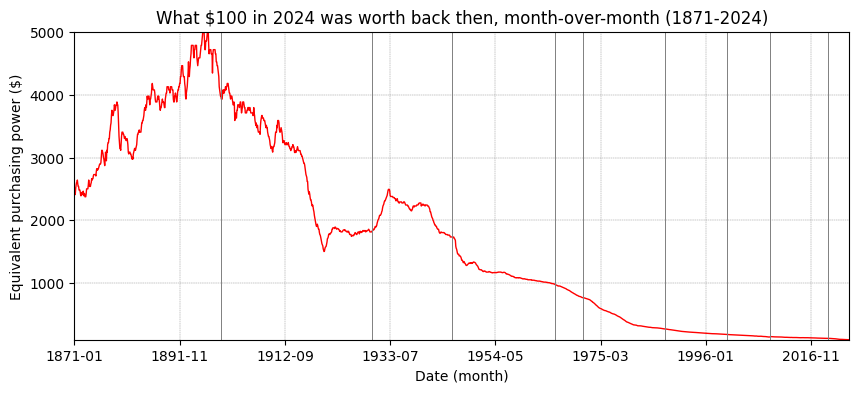

In [75]:
rev_df.plot(x=DATE_COL, y="real_rev_value", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=348.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=706.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=896.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1141.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1208.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1402.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1550.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1653.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1790.0, ls='-', lw=0.7, c='gray')
plt.title("What $100 in 2024 was worth back then, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Equivalent purchasing power ($)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()